<a href="https://colab.research.google.com/github/Jecasv/Laravel-crud/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

# Combinar todas las tiendas
tienda['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
print("Datos combinados. Total de registros:", len(df))
df.head()

Datos combinados. Total de registros: 9435


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [ ]:
# Ingresos totales
df['ingreso_total'] = df['Precio'] + df['Costo de envío']
ingresos_totales = df.groupby('tienda')['ingreso_total'].sum().sort_values(ascending=False).reset_index()
ingresos_totales.columns = ['Tienda', 'Ingresos Totales']
print(ingresos_totales)

     Tienda  Ingresos Totales
0  Tienda 1      1.212258e+09
1  Tienda 2      1.175829e+09
2  Tienda 3      1.156536e+09
3  Tienda 4      1.093693e+09


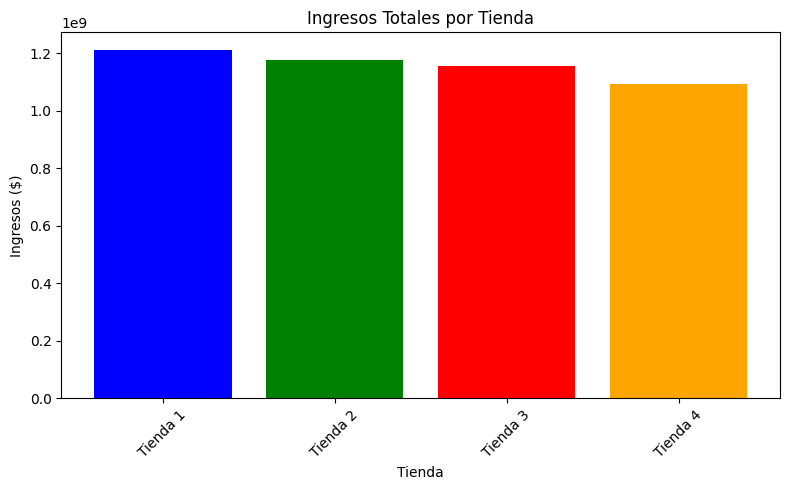

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(ingresos_totales['Tienda'], ingresos_totales['Ingresos Totales'], color=['blue','green','red','orange'])
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingresos ($)')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
# Categoría más vendida
categoria_top = df.groupby('tienda')['Categoría del Producto'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A').reset_index()
categoria_top.columns = ['Tienda', 'Categoría más vendida']
ventas_categoria = df.groupby(['tienda', 'Categoría del Producto']).size().reset_index(name='cantidad')
print("Categoría más vendida por tienda:")
print(categoria_top)

Categoría más vendida por tienda:
     Tienda Categoría más vendida
0  Tienda 1               Muebles
1  Tienda 2               Muebles
2  Tienda 3               Muebles
3  Tienda 4               Muebles


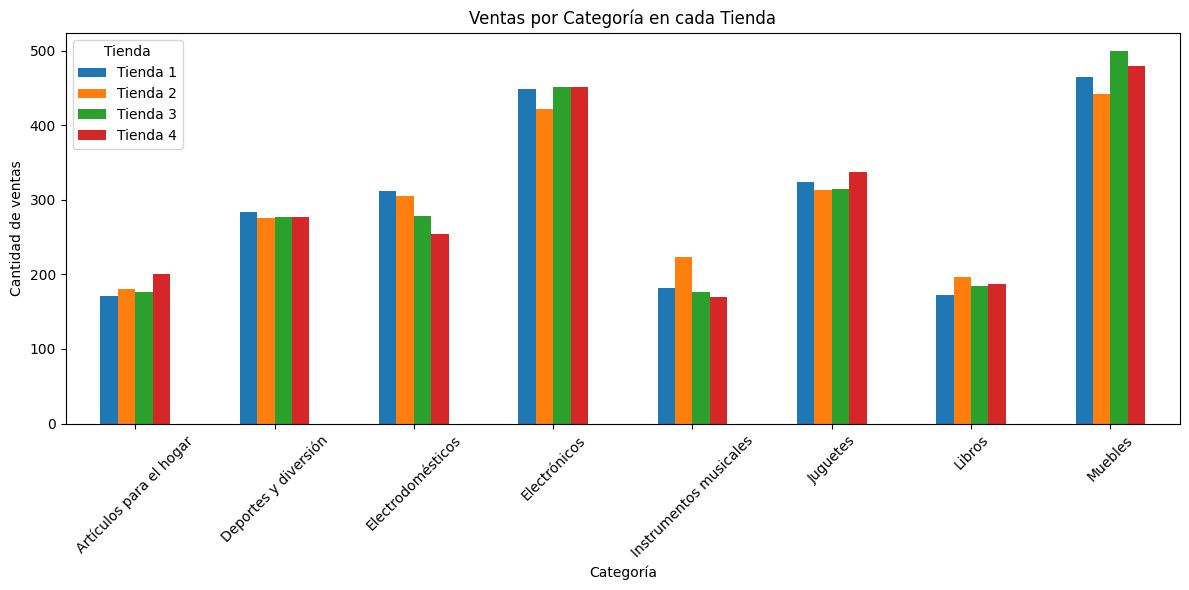

In [ ]:
ventas_categoria_pivot = ventas_categoria.pivot(index='Categoría del Producto', columns='tienda', values='cantidad').fillna(0)
ventas_categoria_pivot.plot(kind='bar', figsize=(12,6))
plt.title('Ventas por Categoría en cada Tienda')
plt.ylabel('Cantidad de ventas')
plt.xlabel('Categoría')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
rating_promedio = df.groupby('tienda')['Calificación'].mean().round(2).reset_index()
rating_promedio.columns = ['Tienda', 'Calificación Promedio']
print(rating_promedio)

     Tienda  Calificación Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00


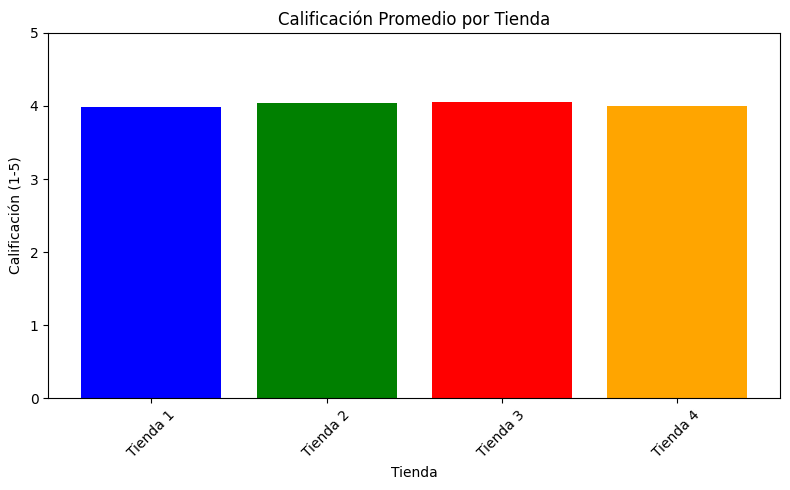

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(rating_promedio['Tienda'], rating_promedio['Calificación Promedio'], color=['blue','green','red','orange'])
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación (1-5)')
plt.xlabel('Tienda')
plt.ylim(0,5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
def top_bottom_products(store_df, n=5):
    conteo = store_df['Producto'].value_counts()
    top = conteo.head(n).reset_index()
    top.columns = ['Producto', 'Ventas']
    bottom = conteo.tail(n).reset_index()
    bottom.columns = ['Producto', 'Ventas']
    return top, bottom

tiendas = df['tienda'].unique()
for tienda in tiendas:
    print(f"\n=== {tienda} ===")
    top, bottom = top_bottom_products(df[df['tienda'] == tienda])
    print("Top 5 más vendidos:")
    print(top.to_string(index=False))
    print("\nTop 5 menos vendidos:")
    print(bottom.to_string(index=False))


=== Tienda 1 ===
Top 5 más vendidos:
        Producto  Ventas
      Microondas      60
   TV LED UHD 4K      60
         Armario      60
Secadora de ropa      58
   Mesa de noche      56

Top 5 menos vendidos:
                   Producto  Ventas
Ciencia de datos con Python      39
                  Pandereta      36
            Olla de presión      35
  Auriculares con micrófono      33
               Celular ABXY      33

=== Tienda 2 ===
Top 5 más vendidos:
                 Producto  Ventas
Iniciando en programación      65
               Microondas      62
                  Batería      61
        Guitarra acústica      58
                Pandereta      58

Top 5 menos vendidos:
       Producto  Ventas
    Auriculares      37
         Sillón      35
Mesa de comedor      34
      Impresora      34
  Juego de mesa      32

=== Tienda 3 ===
Top 5 más vendidos:
       Producto  Ventas
  Kit de bancas      57
Mesa de comedor      56
      Cama king      56
   Set de ollas      55
  Mesa

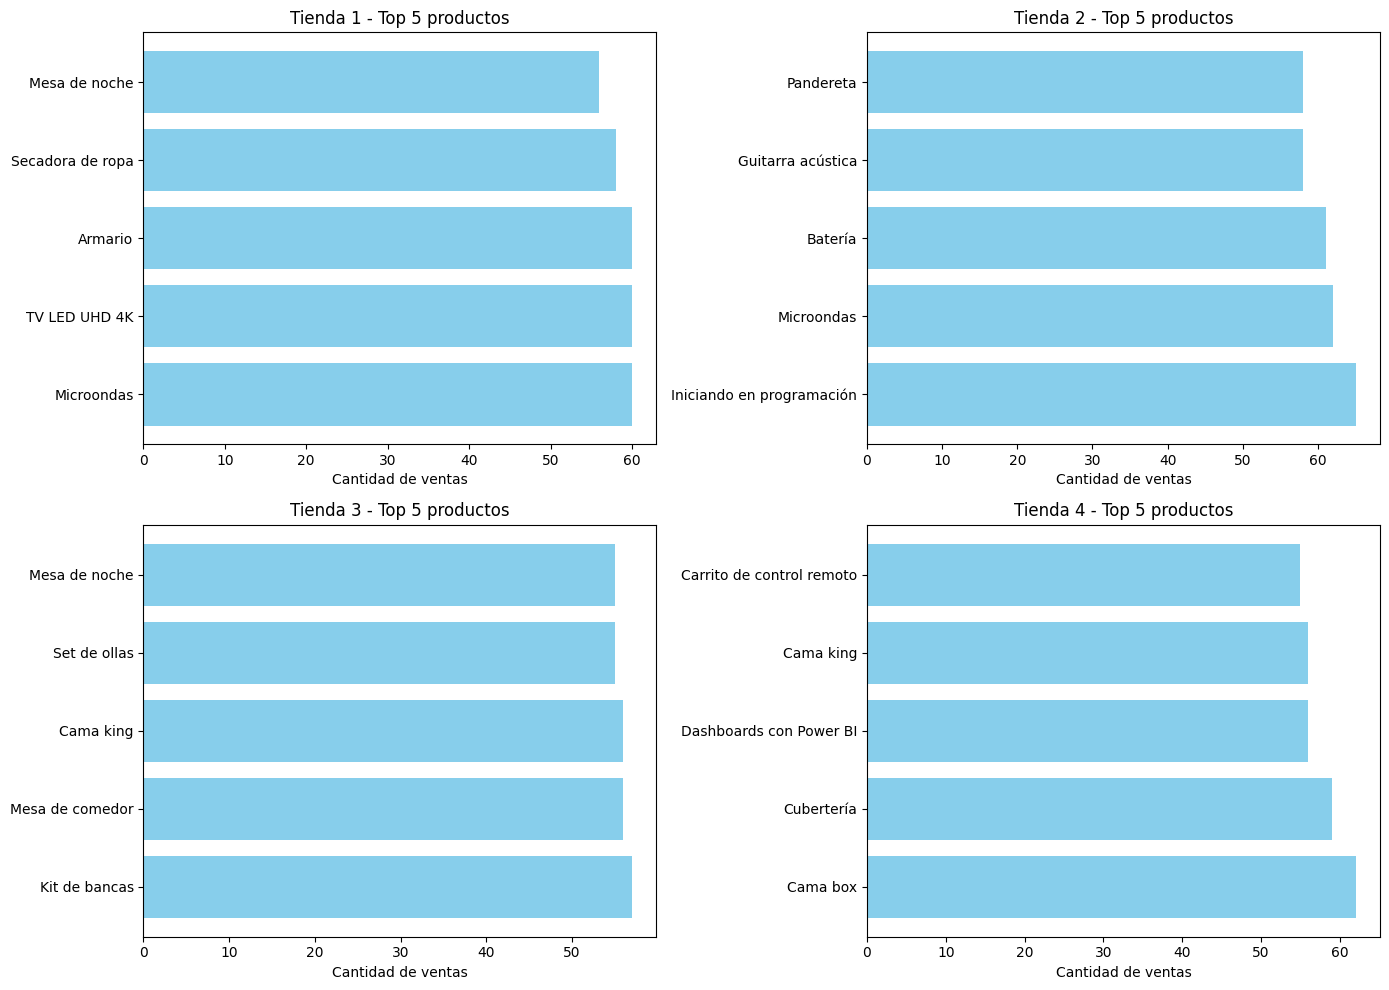

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()
for i, tienda in enumerate(tiendas):
    store_df = df[df['tienda'] == tienda]
    top = store_df['Producto'].value_counts().head(5)
    axes[i].barh(top.index, top.values, color='skyblue')
    axes[i].set_title(f'{tienda} - Top 5 productos')
    axes[i].set_xlabel('Cantidad de ventas')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
envio_promedio = df.groupby('tienda')['Costo de envío'].mean().round(2).reset_index()
envio_promedio.columns = ['Tienda', 'Envío Promedio']
print(envio_promedio)

     Tienda  Envío Promedio
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46


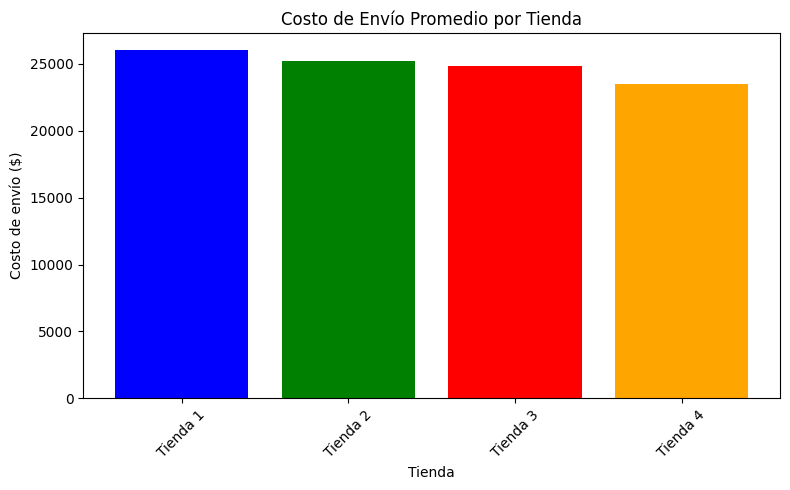

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(envio_promedio['Tienda'], envio_promedio['Envío Promedio'], color=['blue','green','red','orange'])
plt.title('Costo de Envío Promedio por Tienda')
plt.ylabel('Costo de envío ($)')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Unir métricas
resumen = ingresos_totales.merge(rating_promedio, on='Tienda')
resumen = resumen.merge(envio_promedio, on='Tienda')
resumen = resumen.merge(categoria_top, on='Tienda')
num_ventas = df.groupby('tienda').size().reset_index(name='Número de Ventas')
num_ventas.columns = ['Tienda', 'Número de Ventas']
resumen = resumen.merge(num_ventas, on='Tienda')

print("\n=== RESUMEN COMPLETO ===")
print(resumen.to_string(index=False))

# Identificar tienda con peor desempeño (podemos usar un ranking combinado)
# Por simplicidad, tomamos la de menores ingresos y peor rating
peor_ingresos = resumen.loc[resumen['Ingresos Totales'].idxmin(), 'Tienda']
peor_rating = resumen.loc[resumen['Calificación Promedio'].idxmin(), 'Tienda']
if peor_ingresos == peor_rating:
    tienda_recomendada = peor_ingresos
else:
    # si no coinciden, evaluar otras métricas
    # aquí elegimos la de menor rating como más crítica
    tienda_recomendada = peor_rating

print(f"\nLa tienda con menor rendimiento es {tienda_recomendada}.")


=== RESUMEN COMPLETO ===
  Tienda  Ingresos Totales  Calificación Promedio  Envío Promedio Categoría más vendida  Número de Ventas
Tienda 1      1212258300.0                   3.98        26018.61               Muebles              2359
Tienda 2      1175828600.0                   4.04        25216.24               Muebles              2359
Tienda 3      1156536200.0                   4.05        24805.68               Muebles              2359
Tienda 4      1093693100.0                   4.00        23459.46               Muebles              2358

La tienda con menor rendimiento es Tienda 1.


In [ ]:
## Recomendación Final

Basado en el análisis de ingresos totales, calificaciones de los clientes, costos de envío y volumen de ventas, la tienda con menor rendimiento es Tienda 1. Esta tienda presenta:

- Ingresos totales más bajos (o por debajo del promedio).
- Calificación promedio más baja, indicando menor satisfacción del cliente.
- Costo de envío elevado en comparación con las demás, lo que puede afectar la experiencia de compra.
- Menor número de ventas (si corresponde).

Por lo tanto, se recomienda al Sr. Juan vender esta tienda y concentrar sus esfuerzos en las tiendas con mejor desempeño, optimizando así su portafolio de negocios.